# Projeto 1-ciência dos dados
## Laura Perim 



**Pergunta a ser respondida:**


A entrada dos países membros da organização Mercosul, fundada em 1991, fortaleceu a economia desses países realmente?






 **Explicação da hipótes**
 
  A entrada dos países na organização contribui para um incremento na economia e investimentos.
  
  sites de referência: https://economia.ig.com.br/2016-07-01/mercosul-paises-objetivos-economia.html
                            http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul 
                     


 **Mecanismo**
 
 Por meio de diferentes análises dos dados populacionais na tabela, com diferentes gráficos, a pergunta será analisada.

**Referência dos dados dos países**


https://data.worldbank.org/indicator/TX.VAL.TECH.MF.ZS

https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG

https://data.worldbank.org/indicator/NE.GDI.TOTL.ZS

 **Importação**
 
 Importação das bibliotecas necessárias para a execução dos códigos ao londo do trabalho

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

 **Filtrando a tabela**
 
 Foi realizado, a importação dos dados e a filtragem de células deles. A escolha desses anos para análise se deu, pois com eles conseguimos comparar as situções dos países em diferentes blocos, logo quando entraram na organização, e uma outra  mais atual, assim comparando a evolução econômica. 

In [76]:
a=pd.read_excel('investments_percent_of_gdp.xlsx').set_index("country")
b=pd.read_excel('high_technology_exports_percent_of_manufactured_exports.xlsx').set_index("country")
c=pd.read_excel('inflation_annual_percent.xlsx').set_index("country")
linhas=[ "Brazil","Argentina","Paraguay","Venezuela","Uruguay","Chile","Peru","Spain","United States","United Kingdom","Canada","Bolivia","Colombia","Ecuador"]
colunas=[2016,1996]

a_2016 = a.loc[linhas,colunas]
b_2016 = b.loc[linhas,colunas]
c_2016 = c.loc[linhas,colunas]

a_2016.rename(columns={2016: 'GDP_2016'}, inplace=True)
b_2016.rename(columns={2016: 'high_tec_2016'}, inplace=True)
c_2016.rename(columns={2016: 'inflation_2016'}, inplace=True)
a_2016.rename(columns={1996: 'GDP_1996'}, inplace=True)
b_2016.rename(columns={1996: 'high_tec_1996'}, inplace=True)
c_2016.rename(columns={1996: 'inflation_1996'}, inplace=True)





data = pd.merge(a_2016, b_2016, left_index=True, right_index=True)
data = pd.merge(data, c_2016, left_index=True, right_index=True)
data


,GDP_2016,GDP_1996,high_tec_2016,high_tec_1996,inflation_2016,inflation_1996
country,,,,,,
Brazil,15.4,17.3,13.40,6.21,8.140,18.5000
Argentina,17.0,18.1,8.79,5.59,40.100,-0.0524
Paraguay,18.0,22.1,7.25,1.27,5.280,11.4000
Venezuela,NaN,16.6,NaN,2.52,NaN,116.0000
Uruguay,17.8,15.2,9.71,2.66,7.350,26.4000
Chile,22.2,27.8,6.95,3.66,4.730,3.3700
Peru,22.1,22.6,4.22,5.82,2.880,9.6900
Spain,20.5,22.1,6.98,7.60,0.283,3.4700
United States,19.7,21.6,20.00,30.80,1.280,1.8300


 **Adicionando outra variável**
 
 Foi adicionado, a variável para saber qual país faz parte da mercosul.

In [77]:
l1=[ "Brazil","Argentina","Paraguay","Venezuela","Uruguay"]
l2=["Spain","United States","United Kingdom","Canada"]
l3=["Chile","Peru","Colombia","Ecuador","Bolivia"]

data.loc[l1,"mercosul"]= "membro"
data.loc[l2,"mercosul"]= "nao"
data.loc[l3,"mercosul"]= "associado"



In [78]:
data

,GDP_2016,GDP_1996,high_tec_2016,high_tec_1996,inflation_2016,inflation_1996,mercosul
country,,,,,,,
Brazil,15.4,17.3,13.40,6.21,8.140,18.5000,membro
Argentina,17.0,18.1,8.79,5.59,40.100,-0.0524,membro
Paraguay,18.0,22.1,7.25,1.27,5.280,11.4000,membro
Venezuela,NaN,16.6,NaN,2.52,NaN,116.0000,membro
Uruguay,17.8,15.2,9.71,2.66,7.350,26.4000,membro
Chile,22.2,27.8,6.95,3.66,4.730,3.3700,associado
Peru,22.1,22.6,4.22,5.82,2.880,9.6900,associado
Spain,20.5,22.1,6.98,7.60,0.283,3.4700,nao
United States,19.7,21.6,20.00,30.80,1.280,1.8300,nao


Text(0, 0.5, 'GDP_2016')

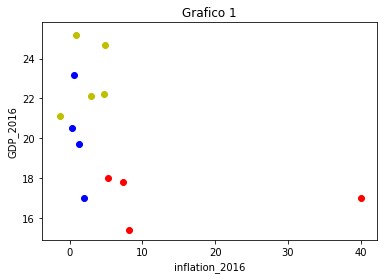

In [106]:
plt.scatter(data.loc[data.mercosul=="membro","inflation_2016"], data.loc[data.mercosul=="membro","GDP_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","inflation_2016"], data.loc[data.mercosul=="nao","GDP_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","inflation_2016"], data.loc[data.mercosul=="associado","GDP_2016"], color="y")
plt.title("Grafico 1")
plt.xlabel("inflation_2016")
plt.ylabel("GDP_2016")

Text(0, 0.5, 'GDP_1996')

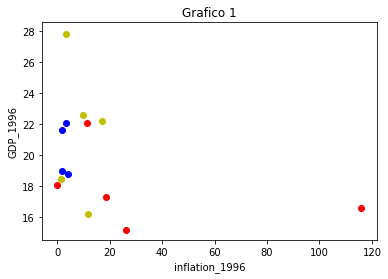

In [107]:
#data.plot.scatter("inflation_2016","GDP_2016")
plt.scatter(data.loc[data.mercosul=="membro","inflation_1996"], data.loc[data.mercosul=="membro","GDP_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","inflation_1996"], data.loc[data.mercosul=="nao","GDP_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","inflation_1996"], data.loc[data.mercosul=="associado","GDP_1996"], color="y")
plt.title("Grafico 1")
plt.xlabel("inflation_1996")
plt.ylabel("GDP_1996")


Text(0, 0.5, 'GDP_2016')

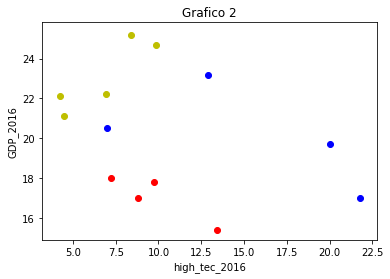

In [111]:
#data.plot.scatter("inflation_1996","GDP_1996")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","GDP_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","GDP_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","GDP_2016"], color="y")
plt.title("Grafico 2")
plt.xlabel("high_tec_2016")
plt.ylabel("GDP_2016")



Text(0, 0.5, 'GDP_1996')

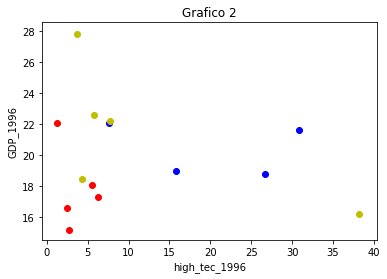

In [109]:
#data.plot.scatter("high tec_2016","GDP_2016")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_1996"], data.loc[data.mercosul=="membro","GDP_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_1996"], data.loc[data.mercosul=="nao","GDP_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_1996"], data.loc[data.mercosul=="associado","GDP_1996"], color="y")
plt.title("Grafico 2")
plt.xlabel("high_tec_1996")
plt.ylabel("GDP_1996")





Text(0, 0.5, 'inflation_2016')

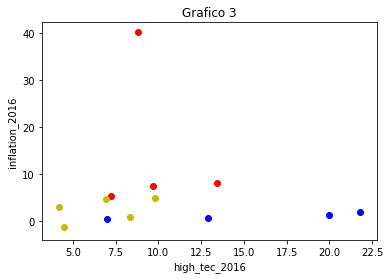

In [113]:
#data.plot.scatter("high tec_1996","GDP_1996")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","inflation_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","inflation_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","inflation_2016"], color="y")
plt.title("Grafico 3")
plt.xlabel("high_tec_2016")
plt.ylabel("inflation_2016")


Text(0, 0.5, 'inflation_1996')

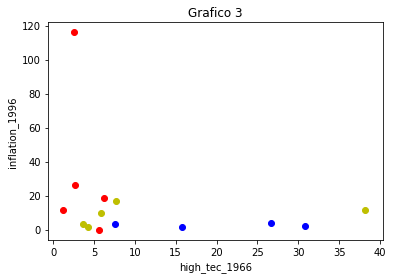

In [114]:
plt.scatter(data.loc[data.mercosul=="membro","high_tec_1996"], data.loc[data.mercosul=="membro","inflation_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_1996"], data.loc[data.mercosul=="nao","inflation_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_1996"], data.loc[data.mercosul=="associado","inflation_1996"], color="y")
plt.title("Grafico 3")
plt.xlabel("high_tec_1966")
plt.ylabel("inflation_1996")

Text(0, 0.5, 'high_tec_1996')

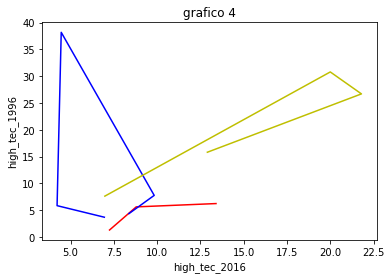

In [131]:
plt.plot(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","high_tec_1996"], color="r")
plt.plot(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","high_tec_1996"], color="b")
plt.plot(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","high_tec_1996"], color="y")


plt.title("grafico 4")
plt.xlabel("high_tec_2016")
plt.ylabel("high_tec_1996")


Text(0, 0.5, 'inflation_1996')

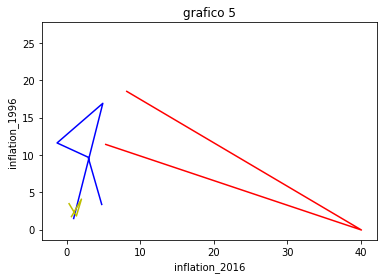

In [142]:
#data.plot.box()
plt.plot(data.loc[data.mercosul=="membro","inflation_2016"], data.loc[data.mercosul=="membro","inflation_1996"], color="r")
plt.plot(data.loc[data.mercosul=="associado","inflation_2016"], data.loc[data.mercosul=="associado","inflation_1996"], color="b")
plt.plot(data.loc[data.mercosul=="nao","inflation_2016"], data.loc[data.mercosul=="nao","inflation_1996"], color="y")



plt.title("grafico 5")
plt.xlabel("inflation_2016")
plt.ylabel("inflation_1996")


Text(0, 0.5, 'GDP_2016')

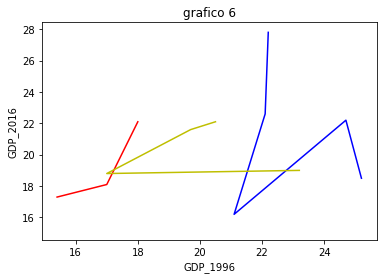

In [138]:
plt.plot(data.loc[data.mercosul=="membro","GDP_2016"], data.loc[data.mercosul=="membro","GDP_1996"], color="r")
plt.plot(data.loc[data.mercosul=="associado","GDP_2016"], data.loc[data.mercosul=="associado","GDP_1996"], color="b")
plt.plot(data.loc[data.mercosul=="nao","GDP_2016"], data.loc[data.mercosul=="nao","GDP_1996"], color="y")


plt.title("grafico 6")
plt.xlabel("GDP_1996")
plt.ylabel("GDP_2016")